In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('AB_NYC_2019.csv', nrows=10000)

In [13]:
h = df.neighbourhood.value_counts().values
x = np.arange(len(h))

In [8]:
df.neighbourhood.value_counts().tail()

Riverdale            1
Claremont Village    1
Whitestone           1
Fordham              1
Neponsit             1
Name: neighbourhood, dtype: int64

<BarContainer object of 171 artists>

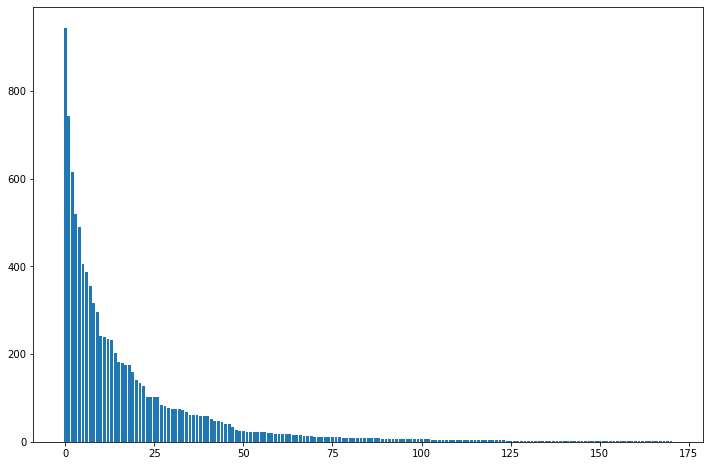

In [14]:
plt.figure(figsize=(12, 8))
plt.bar(x, h)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
df.neighbourhood_group = df.neighbourhood_group.str.lower().str.replace(' ', '_').fillna('NA')
df.neighbourhood = df.neighbourhood.str.lower().str.replace(' ', '_').fillna('NA')
df.room_type = df.room_type.str.lower().str.replace(' ', '_').fillna('NA')

In [19]:
cats = 'neighbourhood_group=' + df.neighbourhood_group + ' ' + \
    'neighbourhood=' + df.neighbourhood+ ' ' + \
    'room_type=' + df.room_type

In [20]:
cats.iloc[0]

'neighbourhood_group=brooklyn neighbourhood=kensington room_type=private_room'

In [24]:
cv_categories = CountVectorizer(token_pattern='\S+', min_df=100)
cv_categories.fit(cats)

CountVectorizer(min_df=100, token_pattern='\\S+')

In [26]:
len(cv_categories.get_feature_names())

34

In [28]:
cv_categories.get_feature_names()

['neighbourhood=astoria',
 'neighbourhood=bedford-stuyvesant',
 'neighbourhood=bushwick',
 'neighbourhood=chelsea',
 'neighbourhood=clinton_hill',
 'neighbourhood=crown_heights',
 'neighbourhood=east_harlem',
 'neighbourhood=east_village',
 'neighbourhood=flatbush',
 'neighbourhood=fort_greene',
 'neighbourhood=greenpoint',
 'neighbourhood=greenwich_village',
 'neighbourhood=harlem',
 "neighbourhood=hell's_kitchen",
 'neighbourhood=kips_bay',
 'neighbourhood=long_island_city',
 'neighbourhood=lower_east_side',
 'neighbourhood=midtown',
 'neighbourhood=park_slope',
 'neighbourhood=prospect-lefferts_gardens',
 'neighbourhood=prospect_heights',
 'neighbourhood=south_slope',
 'neighbourhood=upper_east_side',
 'neighbourhood=upper_west_side',
 'neighbourhood=washington_heights',
 'neighbourhood=west_village',
 'neighbourhood=williamsburg',
 'neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'room_type=entire_home/a

In [29]:
text = 'neighbourhood_group=brooklyn neighbourhood=morris_park room_type=private_room'

In [30]:
X = cv_categories.transform([text])

In [32]:
dict(zip(cv_categories.get_feature_names(), X.toarray()[0]))

{'neighbourhood=astoria': 0,
 'neighbourhood=bedford-stuyvesant': 0,
 'neighbourhood=bushwick': 0,
 'neighbourhood=chelsea': 0,
 'neighbourhood=clinton_hill': 0,
 'neighbourhood=crown_heights': 0,
 'neighbourhood=east_harlem': 0,
 'neighbourhood=east_village': 0,
 'neighbourhood=flatbush': 0,
 'neighbourhood=fort_greene': 0,
 'neighbourhood=greenpoint': 0,
 'neighbourhood=greenwich_village': 0,
 'neighbourhood=harlem': 0,
 "neighbourhood=hell's_kitchen": 0,
 'neighbourhood=kips_bay': 0,
 'neighbourhood=long_island_city': 0,
 'neighbourhood=lower_east_side': 0,
 'neighbourhood=midtown': 0,
 'neighbourhood=park_slope': 0,
 'neighbourhood=prospect-lefferts_gardens': 0,
 'neighbourhood=prospect_heights': 0,
 'neighbourhood=south_slope': 0,
 'neighbourhood=upper_east_side': 0,
 'neighbourhood=upper_west_side': 0,
 'neighbourhood=washington_heights': 0,
 'neighbourhood=west_village': 0,
 'neighbourhood=williamsburg': 0,
 'neighbourhood_group=bronx': 0,
 'neighbourhood_group=brooklyn': 1,
 'n

In [83]:
cv = CountVectorizer(min_df=100)
cv.fit(df.name.fillna(''))

CountVectorizer(min_df=100)

In [75]:
X_cat = cv_categories.transform(cats)

In [76]:
X_text = cv.transform(df.name.fillna(''))

In [77]:
X_cat

<10000x34 sparse matrix of type '<class 'numpy.int64'>'
	with 27848 stored elements in Compressed Sparse Row format>

In [78]:
X_text

<10000x98 sparse matrix of type '<class 'numpy.int64'>'
	with 36103 stored elements in Compressed Sparse Row format>

In [79]:
import scipy 

In [84]:
scipy.sparse.hstack([X_cat, X_text])

<10000x132 sparse matrix of type '<class 'numpy.int64'>'
	with 63951 stored elements in COOrdinate format>

In [106]:
df['is_expensive'] = (df.price >= 1000)

In [107]:
df.is_expensive.mean()

0.0081

In [108]:
from sklearn.model_selection import train_test_split

In [128]:
df_train, df_test = train_test_split(df, random_state=1, stratify=df.is_expensive)

In [129]:
df_train.is_expensive.mean()

0.008133333333333333

In [130]:
df_test.is_expensive.mean()

0.008